In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [4]:
data = pd.read_csv("harga_emas_standar.csv", delimiter= '|')

In [5]:
data.head(3)

,tgl_berlaku,harga_emas
0,2013-01-30,500000.0
1,2013-04-04,450000.0
2,2013-04-22,450000.0


In [6]:
data["tgl_berlaku"]= pd.to_datetime(data["tgl_berlaku"])

In [8]:
data['harga_emas'] = data['harga_emas'].astype(int) 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tgl_berlaku  268 non-null    datetime64[ns]
 1   harga_emas   268 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 3.3 KB


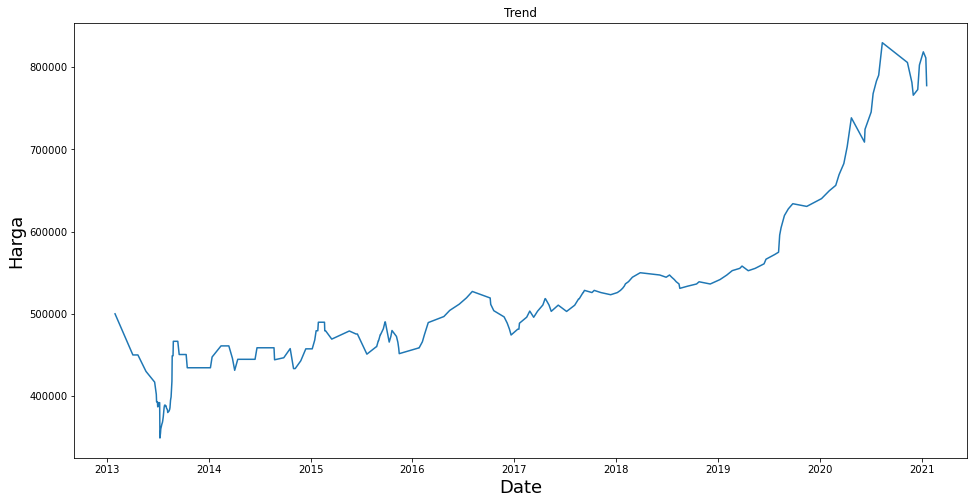

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(data['tgl_berlaku'], data['harga_emas'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Harga', fontsize=18)
plt.show()

In [11]:
df = data
df['harga_emas_shift'] = df['harga_emas'] - df['harga_emas'].shift(1)
y = df['harga_emas_shift']

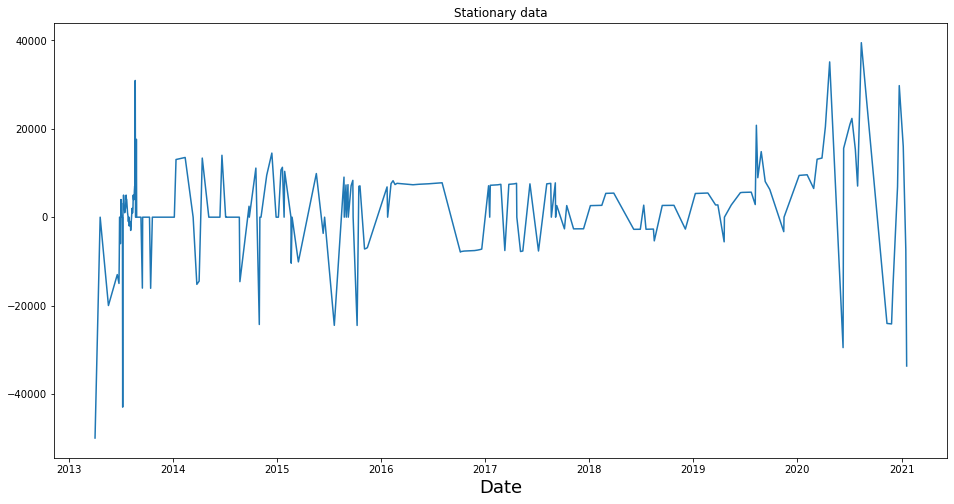

In [12]:
plt.figure(figsize=(16,8))
plt.plot(df['tgl_berlaku'],df['harga_emas_shift'])
plt.title('Stationary data')
plt.xlabel('Date', fontsize=18)
plt.show()

In [13]:
model = Prophet()

In [14]:
df.head(4)

,tgl_berlaku,harga_emas,harga_emas_shift
0,2013-01-30,500000,NaN
1,2013-04-04,450000,-50000.0
2,2013-04-22,450000,0.0
3,2013-05-21,430000,-20000.0


In [15]:
## Rename the columns as ds and y
df_pht = df.rename(columns={'tgl_berlaku':'ds', 'harga_emas_shift':'y'})#, inplace=True)

In [16]:

## Split the Data
train_data_len = int(0.8*len(df))
train_data_len

214

In [17]:
df_train = df_pht[:train_data_len]
df_test = df_pht[train_data_len:]
df_train.head(), df_train.shape

(          ds  harga_emas        y
 0 2013-01-30      500000      NaN
 1 2013-04-04      450000 -50000.0
 2 2013-04-22      450000      0.0
 3 2013-05-21      430000 -20000.0
 4 2013-06-21      417000 -13000.0,
 (214, 3))

In [18]:
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
periods = len(df)-len(df_train)
periods

54

In [20]:
# Create Future Datas of len(df)-len(df_train) days
future_dates = model.make_future_dataframe(periods=periods)

In [21]:
# Shape after adding 401 days
future_dates.shape

(268, 1)

In [23]:
future_dates.tail()

,ds
263,2018-04-19
264,2018-04-20
265,2018-04-21
266,2018-04-22
267,2018-04-23


In [24]:
# Make Prediction 
prediction = model.predict(future_dates)

In [25]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-30,-1269.243672,-6629.896807,12608.614578,-1269.243672,-1269.243672,3912.470858,3912.470858,3912.470858,-2107.754122,-2107.754122,-2107.754122,6020.224981,6020.224981,6020.224981,0.0,0.0,0.0,2643.227186
1,2013-04-04,-1204.681588,-25615.434790,-8307.016852,-1204.681588,-1204.681588,-15591.792493,-15591.792493,-15591.792493,-234.128189,-234.128189,-234.128189,-15357.664304,-15357.664304,-15357.664304,0.0,0.0,0.0,-16796.474081
2,2013-04-22,-1186.523502,-3975.929490,14285.859897,-1186.523502,-1186.523502,6601.388380,6601.388380,6601.388380,1398.697116,1398.697116,1398.697116,5202.691263,5202.691263,5202.691263,0.0,0.0,0.0,5414.864878
3,2013-05-21,-1157.268807,-10486.608757,7269.996890,-1157.268807,-1157.268807,-663.187984,-663.187984,-663.187984,-464.139605,-464.139605,-464.139605,-199.048379,-199.048379,-199.048379,0.0,0.0,0.0,-1820.456792
4,2013-06-21,-1125.996548,-10972.919412,7080.194275,-1125.996548,-1125.996548,-804.851162,-804.851162,-804.851162,1821.480811,1821.480811,1821.480811,-2626.331972,-2626.331972,-2626.331972,0.0,0.0,0.0,-1930.847709


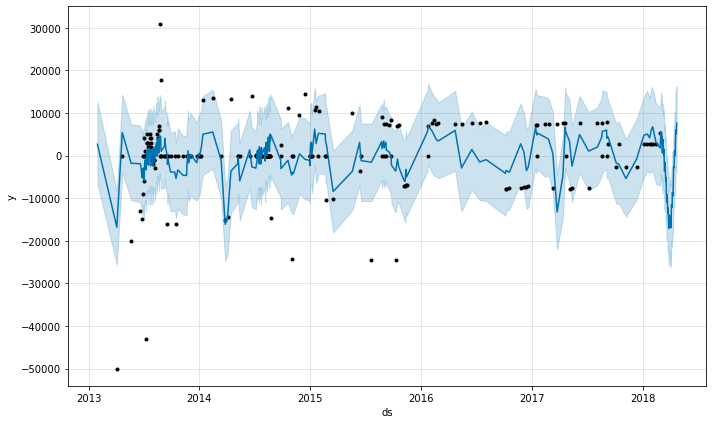

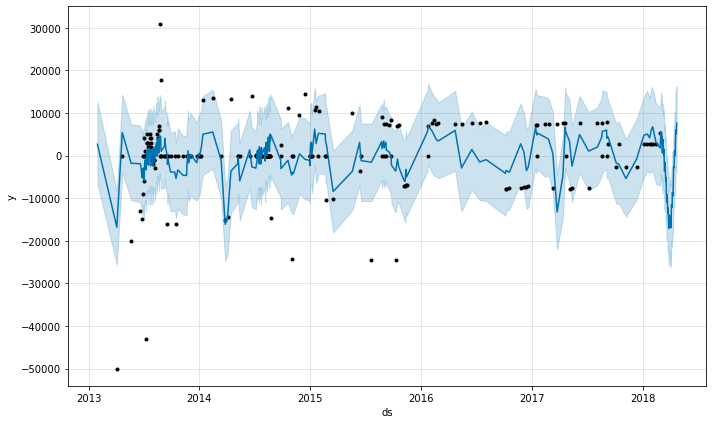

In [26]:
# Plot Our Predictions
model.plot(prediction)

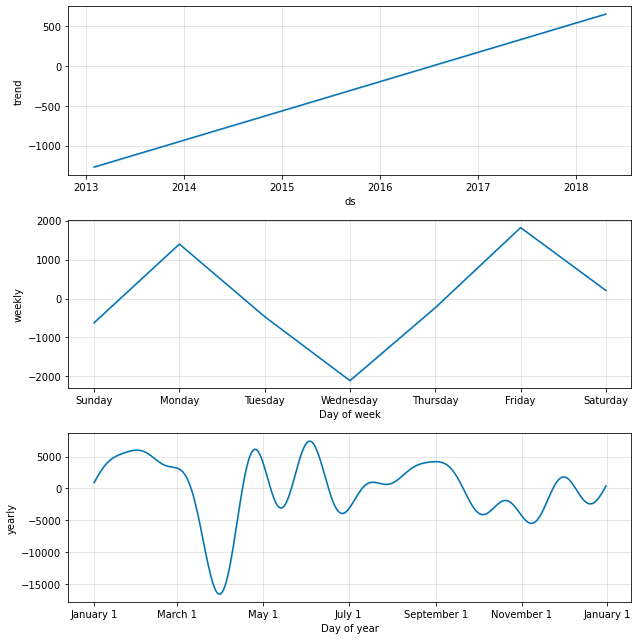

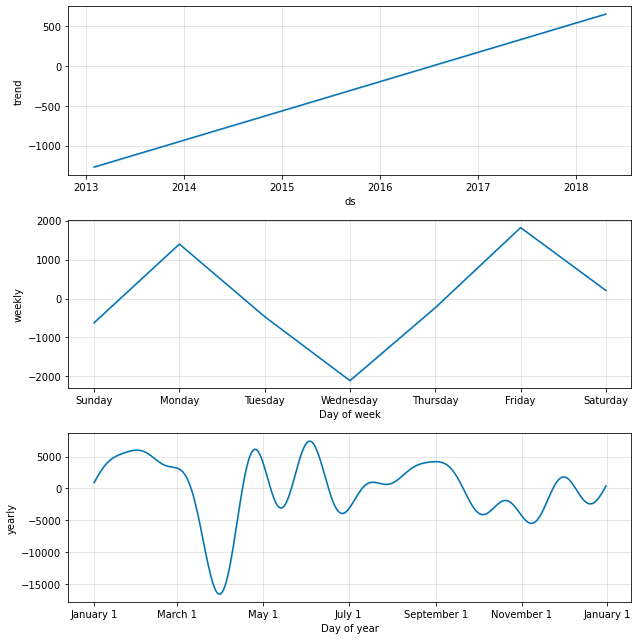

In [27]:
model.plot_components(prediction)

In [28]:
# import cross_validation
from fbprophet.diagnostics import cross_validation

In [29]:
df_train.shape, len(df)-len(df_train)

((214, 3), 54)

In [31]:
cv = cross_validation(model, initial='250 days', period='1 days', horizon = '100 days')

INFO:fbprophet:Making 1442 forecasts with cutoffs between 2013-12-10 00:00:00 and 2017-11-20 00:00:00
